### <caenter> Подготовительная часть для выполнения практического задания

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [4]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])

X = np.array(
    [
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]
    ]
)

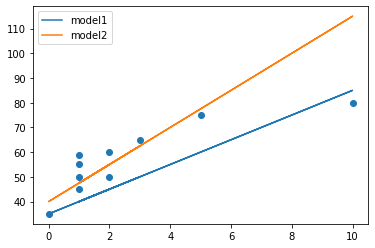

In [5]:
plt.scatter(X[1], y)
plt.plot(X[1], 35 * X[0] + X[1] * 5, label='model1')
plt.plot(X[1], 40 * X[0] + X[1] * 7.5, label='model2')
plt.legend(loc='best')
plt.show()

In [6]:
y_pred1 = np.ones(10) * 35 + X[1] * 5
y_pred2 = np.ones(10) * 40 + X[1] * 7.5

In [7]:
y_pred1

array([40., 40., 45., 40., 50., 35., 60., 85., 40., 45.])

In [8]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

$\displaystyle MAE = \frac{1}{l} \sum_{i=1}^{l}|y_{i}-\hat{y_i}|$  
$\displaystyle MSE = \frac{1}{l} \sum_{i=1}^{l}(y_{i}-\hat{y_i})^2$

In [9]:
mae_1 = np.mean(np.abs(y_pred1 - y))
mae_2 = np.mean(np.abs(y_pred2 - y))

In [10]:
mae_1, mae_2

(10.4, 7.9)

In [11]:
mse_1 = np.mean((y_pred1 - y) ** 2)
mse_2 = np.mean((y_pred2 - y) ** 2)

In [12]:
mse_1, mse_2

(143.6, 151.35)

$MAE_1>MAE_2$ но $MSE_1<MSE_2$
Выбор метрики:
 * $MSE$ - в случае, если есть выбросы, и они имеют значение при работе модели
 * $MAE$ - в случае, если выбросы не важны, модель должна хорошо работать на большинстве моделей

Аналитический метод нахождения вектора весов в модели линейной регрессии:
$w=(X^{T}\cdot X)^{-1}\cdot X^{T}\cdot Y$

Реализация:

In [13]:
W_0 = np.linalg.inv(X @ X.T) @ X @ y
W_0
# отличается от классического вида, поскольку у нас изначально массив
# Х представляет собой транспонированную матрицу
# для приведения к классическому виду необходимо изначально
# задавать вектор признаков и вектор значений в иной размерности
# код ниже

array([47.23214286,  3.91071429])

In [14]:
X1 = X.swapaxes(0, 1)
y1 = y.reshape((len(y), -1))
W1 = np.linalg.inv(X1.T @ X1) @ X1.T @ y1
W1

array([[47.23214286],
       [ 3.91071429]])

In [15]:
# ковариационная матрица
np.dot(X, X.T)
#np.dot(X1.T,X1)

array([[ 10,  26],
       [ 26, 146]])

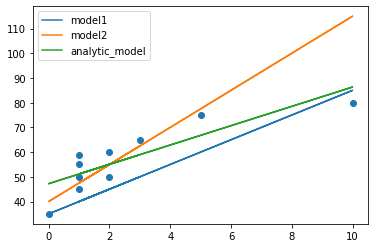

In [16]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='model1')
plt.plot(X[1], 40 * np.ones(10) + X[1] * 7.5, label='model2')
plt.plot(X[1], W_0[0] + W_0[1] * X[1], label='analytic_model')
plt.legend(loc='best')
plt.show()

In [17]:
y_pred3 = W_0[0] + W_0[1] * X[1]

In [18]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [19]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [20]:
calc_mae(y, y_pred1), calc_mae(y, y_pred2), calc_mae(y, y_pred3)

(10.4, 7.9, 6.182142857142858)

In [21]:
calc_mse(y, y_pred1), calc_mse(y, y_pred2), calc_mse(y, y_pred3)


(143.6, 151.35, 45.93749999999999)

Аналитическая формула имеет недостатки использования при вычислении весов линейной
модели в следствии того, что вычисление обратной матрицы при большом количестве признаков
имеет высокую вычислительную сложность.

## <center> Практическое задание

**1. Подберите скорость обучения($\alpha$) и количество итераций:**

In [30]:
n = X.shape[1]
alpha = 0.01

W = np.array([1, 0.5])
W, alpha
# Увеличил скорость обучения

(array([1. , 0.5]), 0.01)

In [25]:
for i in range(1000):
    y_pred = W @ X
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % 100 == 0:
        print(i, W, err)

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001848
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666764
400 [46.56511152  4.03388672] 46.18175564810758
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758049
800 [47.2219474   3.91259695] 45.937557064435396
900 [47.228558    3.91137626] 45.937507054979434


**2\*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:**

In [31]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    # for ii in range(W.shape[0]):
    # W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W = W - np.array([alpha * (1 / n * 2 * np.sum(X[0] * (y_pred - y))),alpha * (1 / n * 2 * np.sum(X[1] * (y_pred - y)))])
    if i % 100 == 0:
        print(i, W,1 / n * 2 * np.sum(X * (y_pred - y)) )
    elif i==1:
        print(W,1 / n * 2 * np.sum(X * (y_pred - y)))
 # Дополнил формулу, ошибка была в правой части уравнения ( векторной части ), не правильно считалась переменная влияющая на W

0 [2.102 3.9  ] -450.20000000000005
[3.00516  6.249896] -325.30559999999997
100 [31.88770806  6.74418155] -13.145339231172171
200 [41.83683774  4.90699865] -4.622074186020659
300 [45.33508261  4.26102097] -1.6251820820582552
400 [46.56511152  4.03388672] -0.5714353975172983
500 [46.99760587  3.95402334] -0.20092420236515807
600 [47.14967657  3.92594232] -0.07064759248638097
700 [47.20314662  3.91606866] -0.024840622808875425
800 [47.2219474   3.91259695] -0.008734289730429624
900 [47.228558    3.91137626] -0.0030710911590816183


In [50]:
az=X[0]*(y_pred-y)
np.sum(az)

-161.4038461538462

In [51]:
ab=X*(y_pred-y)
np.sum(ab)

-3.765876499528531e-13

In [52]:
ad=X[1]*(y_pred-y)
np.sum(ad)

161.40384615384582

In [53]:
X[0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
X[1]

array([ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2])

In [56]:
np.sum(az+ad)

-3.126388037344441e-13

In [102]:
np.sum(X * (y_pred - y))

-3.765876499528531e-13

In [101]:
np.sum(X[0] * (y_pred - y))

-161.4038461538462

In [97]:
np.sum(X[1] * (y_pred - y))

161.40384615384582

In [98]:
y_pred - y

array([-21.85576923, -31.85576923, -15.53365385, -35.85576923,
       -19.21153846, -23.17788462,  -6.56730769,  45.04326923,
       -26.85576923, -25.53365385])

In [99]:
X[1] * (y_pred - y)

array([-21.85576923, -31.85576923, -31.06730769, -35.85576923,
       -57.63461538,  -0.        , -32.83653846, 450.43269231,
       -26.85576923, -51.06730769])

In [100]:
X[0] * (y_pred - y)

array([-21.85576923, -31.85576923, -15.53365385, -35.85576923,
       -19.21153846, -23.17788462,  -6.56730769,  45.04326923,
       -26.85576923, -25.53365385])

In [29]:
np.array([alpha * (1 / n * 2 * np.sum(X[0] * (y_pred - y))),alpha * (1 / n * 2 * np.sum(X[1] * (y_pred - y)))])

array([-7.95807864e-16,  1.86511111e+00])